# Problem Statement:

Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Reading and Understanding the Dataset

In [948]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [949]:
telecom_data=pd.read_csv("telecom_churn_data.csv")

In [950]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [951]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Observation : There are a total of 214 numeric variables and 12 categorical variables. 

In [952]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

### Handling Missing Values

In [953]:
#Segregating the columns into separate categories

id_columns=['mobile_number','circle_id']
date_columns=[]
for x in range(len(telecom_data.columns)):
    if any(pd.Series(telecom_data.columns[x]).str.contains('_date_|date')):
        date_columns.append(telecom_data.columns[x])

In [954]:
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [955]:
cat_columns=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [956]:
num_columns=[]
for x in telecom_data.columns:
    if x not in id_columns + date_columns+cat_columns:
        num_columns.append(x)

In [957]:
num_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [958]:
print("ID variables = ",len(id_columns))
print("Date variables = ",len(date_columns))
print("Categorical variables = ",len(cat_columns))
print("Numerical variables = ",len(num_columns))
print()

ID variables =  2
Date variables =  12
Categorical variables =  8
Numerical variables =  204



In [959]:
#Finding total percentage of values missing from each columns
print(round(100*(telecom_data.isnull().sum()/len(telecom_data)),2))

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [960]:
#Dropping ID column as they do not hold any relevance is predicting the churned customers

telecom_data.drop(id_columns,axis=1,inplace=True)

In [961]:
telecom_data.shape

(99999, 224)

In [962]:
#Finding columns related to recharge 
recharge_cols=[]
for i in range(0,len(telecom_data.columns)):
    if any(pd.Series(telecom_data.columns[i]).str.contains('_rech_')):
        recharge_cols.append(telecom_data.columns[i])

In [963]:
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

### 1. Impute recharge columns with zeroes

In [964]:
# creating a separate list of recharge columns to impute missing values with zeroes
rech_col_impute = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
        'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
        'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9'
       ]

telecom_data[rech_col_impute]=telecom_data[rech_col_impute].apply(lambda x: x.fillna(0))

In [965]:
#Checking total percentage of values missing from recharge columns after imputing with zero
print(round(100*(telecom_data[rech_col_impute].isnull().sum()/len(telecom_data)),2))

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [966]:
#Checking statistics of the recharge columns
print(telecom_data[rech_col_impute].describe(include='all'))

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count       99999.000000        99999.000000        99999.000000   
mean            0.632806           48.445409           51.393440   
std             1.669040          127.743863          132.629365   
min             0.000000            0.000000            0.000000   
25%             0.000000            0.000000            0.000000 

### 2. Replacing NAN values in categorical variables

In [967]:
#Replace missing values with '-1' in categorical columns
telecom_data[cat_columns] = telecom_data[cat_columns].apply(lambda x: x.fillna(-1))

In [968]:
#Checking total percentage of values missing from recharge columns after imputing with zero
print(round(100*(telecom_data[cat_columns].isnull().sum()/len(telecom_data)),2))

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [969]:
#Finding total percentage of values missing from each columns
print(round(100*(telecom_data.isnull().sum()/len(telecom_data)),2))

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou

### 3. Dropping variables that have more than 70% missing values

In [970]:
missing_values=telecom_data.isnull().sum()/len(telecom_data)

In [971]:
missing_values

loc_og_t2o_mou              0.010180
std_og_t2o_mou              0.010180
loc_ic_t2o_mou              0.010180
last_date_of_month_6        0.000000
last_date_of_month_7        0.006010
last_date_of_month_8        0.011000
last_date_of_month_9        0.016590
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
arpu_9                      0.000000
onnet_mou_6                 0.039370
onnet_mou_7                 0.038590
onnet_mou_8                 0.053781
onnet_mou_9                 0.077451
offnet_mou_6                0.039370
offnet_mou_7                0.038590
offnet_mou_8                0.053781
offnet_mou_9                0.077451
roam_ic_mou_6               0.039370
roam_ic_mou_7               0.038590
roam_ic_mou_8               0.053781
roam_ic_mou_9               0.077451
roam_og_mou_6               0.039370
roam_og_mou_7               0.038590
roam_og_mou_8               0.053781
roam_og_mou_9               0.077451
l

In [972]:
telecom_data=telecom_data.drop(missing_values[missing_values>0.7].index,axis=1)

In [973]:
#Finding total percentage of values missing from each columns after removing more than 70% missing values columns
print(round(100*(telecom_data.isnull().sum()/len(telecom_data)),2))

loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou

In [974]:
telecom_data.shape

(99999, 204)

### Data Preparation

1. Filter high-value customers

    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [975]:
#Average recharge amount for first two months, i.e., 6th and 7th month
telecom_data['avg_rech_amt_6_7'] = (telecom_data['total_rech_amt_6']+telecom_data['total_rech_amt_7'])/2

# Getting data for 70th percentile of the average recharge amount in the first two months (the good phase)
telecom_data=telecom_data.loc[(telecom_data['avg_rech_amt_6_7']>np.percentile(telecom_data['avg_rech_amt_6_7'], 70))]

print(telecom_data.shape)

(29979, 205)


In [976]:
# Dropping the newly created average column as it is no longer required
telecom_data.drop(['avg_rech_amt_6_7'], axis=1, inplace=True)
print(telecom_data.shape)

(29979, 204)


2. Deriving new variables

In [977]:
#Finding out how many customer churned out in the 7th and 8th month

#Total incoming and outgoing minutes of usage for 7th month
telecom_data['total_calls_mou_7'] = telecom_data.total_ic_mou_7 + telecom_data.total_og_mou_7
#Total 2g and 3g data consumption for 7th month
telecom_data['total_internet_mb_7'] =  telecom_data.vol_2g_mb_7 + telecom_data.vol_3g_mb_7

#Total incoming and outgoing minutes of usage for 8th month
telecom_data['total_calls_mou_8'] = telecom_data.total_ic_mou_8 + telecom_data.total_og_mou_8
#Total 2g and 3g data consumption for 8th month
telecom_data['total_internet_mb_8'] =  telecom_data.vol_2g_mb_8 + telecom_data.vol_3g_mb_8

In [978]:
#Finding churned customers in the 7th month
telecom_data['churn_7']=telecom_data.apply(lambda x:1 if(x.total_calls_mou_7==0 and x.total_internet_mb_7==0) else 0, axis=1)

telecom_data['churn_7'].value_counts()

0    29398
1      581
Name: churn_7, dtype: int64

In [979]:
#Finding churned customers in the 8th month
telecom_data['churn_8']=telecom_data.apply(lambda x:1 if(x.total_calls_mou_8==0 and x.total_internet_mb_8==0) else 0, axis=1)

telecom_data['churn_8'].value_counts()

0    28252
1     1727
Name: churn_8, dtype: int64

Observation : Out of a total of 29979 high-value customers, 581 customers churned in the month of July and 1727 customers churned in the month of August.  

In [980]:
#Finding the number of days elapsed since last recharge
telecom_data["days_since_last_recharge_6"]=(pd.to_datetime(telecom_data["last_date_of_month_6"])-pd.to_datetime(telecom_data["date_of_last_rech_6"])).dt.days
telecom_data["days_since_last_recharge_7"]=(pd.to_datetime(telecom_data["last_date_of_month_7"])-pd.to_datetime(telecom_data["date_of_last_rech_7"])).dt.days
telecom_data["days_since_last_recharge_8"]=(pd.to_datetime(telecom_data["last_date_of_month_8"])-pd.to_datetime(telecom_data["date_of_last_rech_8"])).dt.days

In [981]:
#Resetting date columns data again to be able to drop these columns collectively
date_columns=[]
for x in range(len(telecom_data.columns)):
    if any(pd.Series(telecom_data.columns[x]).str.contains('_date_|date')):
        date_columns.append(telecom_data.columns[x])

date_columns     

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [982]:
#Dropping date columns as they do not hold any relevance in predicting the churned customers

telecom_data.drop(date_columns,axis=1,inplace=True)

In [983]:
telecom_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_calls_mou_7,total_internet_mb_7,total_calls_mou_8,total_internet_mb_8,churn_7,churn_8,days_since_last_recharge_6,days_since_last_recharge_7,days_since_last_recharge_8
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0


3. Tag churners and remove attributes of the churn phase

    Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    total_ic_mou_9

    total_og_mou_9

    vol_2g_mb_9

    vol_3g_mb_9


    After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [984]:
#Total incoming and outgoing minutes of usage for 9th month
telecom_data['total_calls_mou_9'] = telecom_data.total_ic_mou_9+telecom_data.total_og_mou_9

In [985]:
#Total 2g and 3g data consumption for 9th month
telecom_data['total_internet_mb_9'] =  telecom_data.vol_2g_mb_9+telecom_data.vol_3g_mb_9

In [986]:
#Create churn variable: Customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the month of september
telecom_data['churn']=telecom_data.apply(lambda x:1 if(x.total_calls_mou_9==0 and x.total_internet_mb_9==0) else 0, axis=1)

In [987]:
telecom_data['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [988]:
#churn rate
print("Churn Rate = ", round(100*(telecom_data['churn'].sum()/len(telecom_data)),2),"%")

Churn Rate =  8.64 %


Observation: Out of a total of 29979 high-value customers, 2589 churned in the month of September.

Therefore, the churn percentage is 8.64%. 

In [989]:
#Segregate the data month wise

def month_wise_split(df):
    col_size = len(df.columns)
    june_col=[]
    july_col=[]
    august_col=[]
    september_col=[]
    other_col=[]
    date_col=[]
    
    for i in range(0, col_size):
        if any(pd.Series(df.columns[i]).str.contains('_6|jun')):
            june_col.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_7|jul')):
            july_col.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_8|aug')):
            august_col.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_9|sep')):
            september_col.append(df.columns[i])
        else:
            other_col.append(df.columns[i])
        if any(pd.Series(df.columns[i]).str.contains('date')):
            date_col.append(df.columns[i])
    return june_col,july_col,august_col,september_col,other_col,date_col

In [990]:
june_col,july_col,august_col,september_col,other_col,date_col=month_wise_split(telecom_data)

In [991]:
#After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

telecom_data.drop(september_col,axis=1,inplace=True)

In [992]:
#Exploring the dataset month wise

#Deriving insights for the 6th,7th and 8th month
telecom_data[june_col].describe(include='all', percentiles = [0.1, 0.25, 0.5, .75, .8, .85, .9, .95, .98])
telecom_data[july_col].describe(include='all', percentiles = [0.1, 0.25, 0.5, .75, .8, .85, .9, .95, .98])
telecom_data[august_col].describe(include='all', percentiles = [0.1, 0.25, 0.5, .75, .8, .85, .9, .95, .98])

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aug_vbc_3g,total_calls_mou_8,total_internet_mb_8,churn_8,days_since_last_recharge_8
count,29979.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.0,29041.000000,29041.000000,29041.000000,29041.000000,29979.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.0,29041.000000,29979.000000,29041.00000,29041.000000,29041.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29385.000000
mean,535.067748,276.459159,387.277278,13.691460,22.177442,90.000551,173.030627,6.705906,1.769414,269.745785,177.922163,185.468308,1.848781,0.0,365.243279,2.095232,7.111893,0.061106,624.107691,68.089452,158.612226,15.188150,241.899720,15.547828,31.415797,2.769714,0.0,49.737203,295.472794,0.02850,12.065624,1.277311,10.226092,613.908403,162.929351,95.677774,1.035425,55.276594,89.803108,69.248761,270.061116,-0.599053,0.114080,0.607525,0.173321,0.140498,-0.280430,129.482436,919.580485,339.309877,0.057607,4.089263
std,492.447887,471.700220,480.450594,75.744432,107.926673,238.064175,236.689325,20.518192,7.513241,369.470137,415.595486,422.331860,11.889492,0.0,622.988427,45.534328,23.236275,3.375300,686.211375,157.806028,218.744959,44.349285,309.094389,73.579277,106.871833,20.599286,0.0,142.998561,360.411762,0.11818,76.095029,13.098826,9.480012,602.047678,172.671442,145.319905,2.405824,104.814186,185.886834,268.616268,859.715968,0.508734,0.357335,1.844605,0.583178,0.975212,0.926108,390.625027,824.971453,909.598916,0.233003,5.088286
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,134.118600,6.480000,33.140000,0.000000,0.000000,0.280000,3.680000,0.000000,0.000000,7.390000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,19.396000,0.790000,7.430000,0.000000,14.690000,0.000000,0.000000,0.000000,0.0,0.000000,14.738000,0.00000,0.000000,0.000000,2.000000,97.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,70.500000,0.000000,0.000000,0.000000
25%,289.782000,32.240000,107.680000,0.000000,0.000000,7.230000,26.860000,0.000000,0.000000,45.390000,0.000000,0.460000,0.000000,0.0,3.160000,0.000000,0.000000,0.000000,188.965000,8.080000,34.310000,0.000000,57.590000,0.000000,0.230000,0.000000,0.0,2.040000,78.930000,0.00000,0.000000,0.000000,4.000000,309.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,370.085000,0.000000,0.000000,1.000000
50%,452.232000,106.390000,251.530000,0.000000,0.000000,30.830000,95.930000,0.310000,0.000000

### Exploratory Data Analysis

Churned customers:
 0    27390
1     2589
Name: churn, dtype: int64


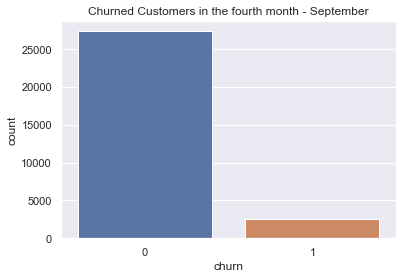

In [993]:
#Target variable : 'churn'
sns.set(font_scale=1)
sns.countplot(x='churn', data=telecom_data)
plt.title("Churned Customers in the fourth month - September")
print("Churned customers:\n",telecom_data['churn'].value_counts())

count    29979.000000
mean       587.587624
std        442.848876
min      -2258.709000
50%        495.951000
max      27731.088000
Name: arpu_6, dtype: float64 

count    29979.000000
mean       589.424681
std        463.049067
min      -2014.045000
50%        493.781000
max      35145.834000
Name: arpu_7, dtype: float64 

count    29979.000000
mean       535.067748
std        492.447887
min       -945.808000
50%        452.232000
max      33543.624000
Name: arpu_8, dtype: float64


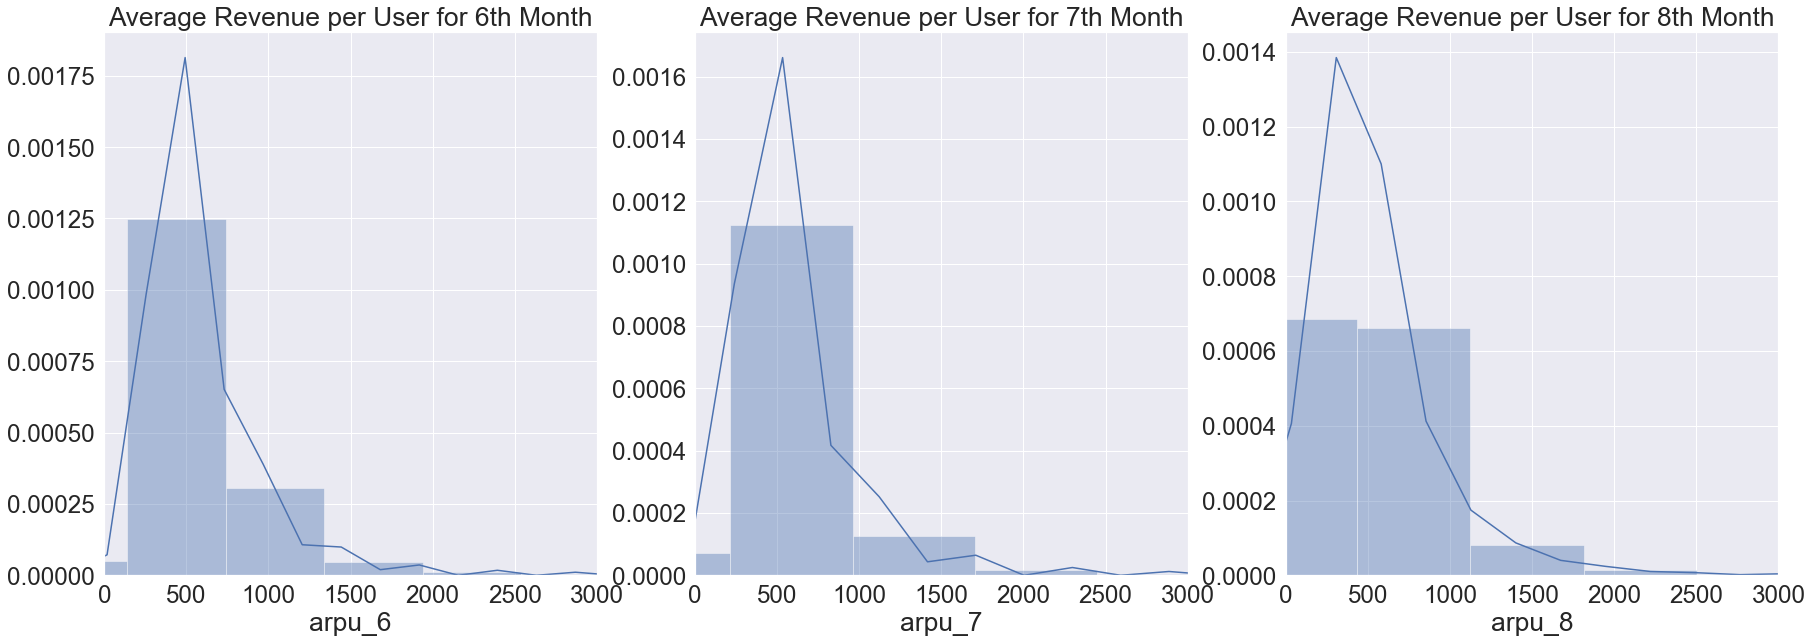

In [994]:
#arpu : average revenue per user
plt.figure(figsize=(30,10))
sns.set(font_scale=2.2)
plt.subplot(1,3,1)
plt.title("Average Revenue per User for 6th Month")
sns.distplot(telecom_data[june_col]["arpu_6"])
plt.xlim(1,3000)
plt.subplot(1,3,2)
plt.title("Average Revenue per User for 7th Month")
sns.distplot(telecom_data[july_col]["arpu_7"])
plt.xlim(1,3000)
plt.subplot(1,3,3)
plt.title("Average Revenue per User for 8th Month")
sns.distplot(telecom_data[august_col]["arpu_8"])
plt.xlim(1,3000)
print(telecom_data[june_col]['arpu_6'].describe(percentiles=[0.5]),'\n')
print(telecom_data[july_col]['arpu_7'].describe(percentiles=[0.5]),'\n')
print(telecom_data[august_col]['arpu_8'].describe(percentiles=[0.5]))

In [995]:
incoming_columns=[]
for x in range(len(telecom_data.columns)):
    if any(pd.Series(telecom_data.columns[x]).str.contains('ic')):
        incoming_columns.append(telecom_data.columns[x])
telecom_data[incoming_columns].head()

,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
7,0.0,16.23,33.49,31.64,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14
8,0.0,0.00,0.00,0.00,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
13,0.0,23.53,144.24,72.11,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44
16,0.0,0.00,2.83,0.00,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00
17,0.0,0.00,4.76,4.81,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,81.96,2.31,0.00,8.63,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,9.91,0.00,0.00,91.88,2.31,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
count,29663.000000,29676.000000,29041.000000
mean,246.664876,250.242986,241.899720
std,313.572850,316.188509,309.094389
min,0.000000,0.000000,0.000000
25%,59.355000,65.780000,57.590000
50%,153.480000,156.950000,150.010000
75%,317.825000,319.122500,310.160000
max,6496.110000,6466.740000,5748.810000


,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
count,29663.000000,29676.000000,29041.000000
mean,51.694485,53.939896,49.737203
std,141.211856,149.898756,142.998561
min,0.000000,0.000000,0.000000
25%,2.860000,3.010000,2.040000
50%,15.430000,16.480000,13.630000
75%,48.040000,50.940000,45.190000
max,5459.630000,6745.760000,5957.140000


,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,29663.000000,29676.000000,29041.000000
mean,11.263071,12.467359,12.065624
std,67.563787,77.343430,76.095029
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,3965.690000,4747.910000,4100.380000


,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
count,29663.000000,29676.000000,29041.000000
mean,17.613734,13.673468,13.691460
std,79.593002,76.719673,75.744432
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,2613.310000,3813.290000,4169.810000


,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8
count,29663.000000,29676.000000,29041.00000
mean,0.067447,0.018248,0.02850
std,0.195231,0.182923,0.11818
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.00000
max,19.760000,21.330000,6.23000


,ic_others_6,ic_others_7,ic_others_8
count,29663.000000,29676.000000,29041.000000
mean,1.202479,1.493254,1.277311
std,14.068195,15.492347,13.098826
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.080000,0.030000,0.080000
max,1344.140000,1495.940000,1209.860000


,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,29979.000000,29979.000000,29979.000000
mean,307.624011,314.954126,295.472794
std,361.286101,369.768358,360.411762
min,0.000000,0.000000,0.000000
25%,90.035000,98.840000,78.930000
50%,205.340000,211.240000,193.530000
75%,393.835000,396.915000,380.450000
max,6798.640000,7279.080000,5990.710000


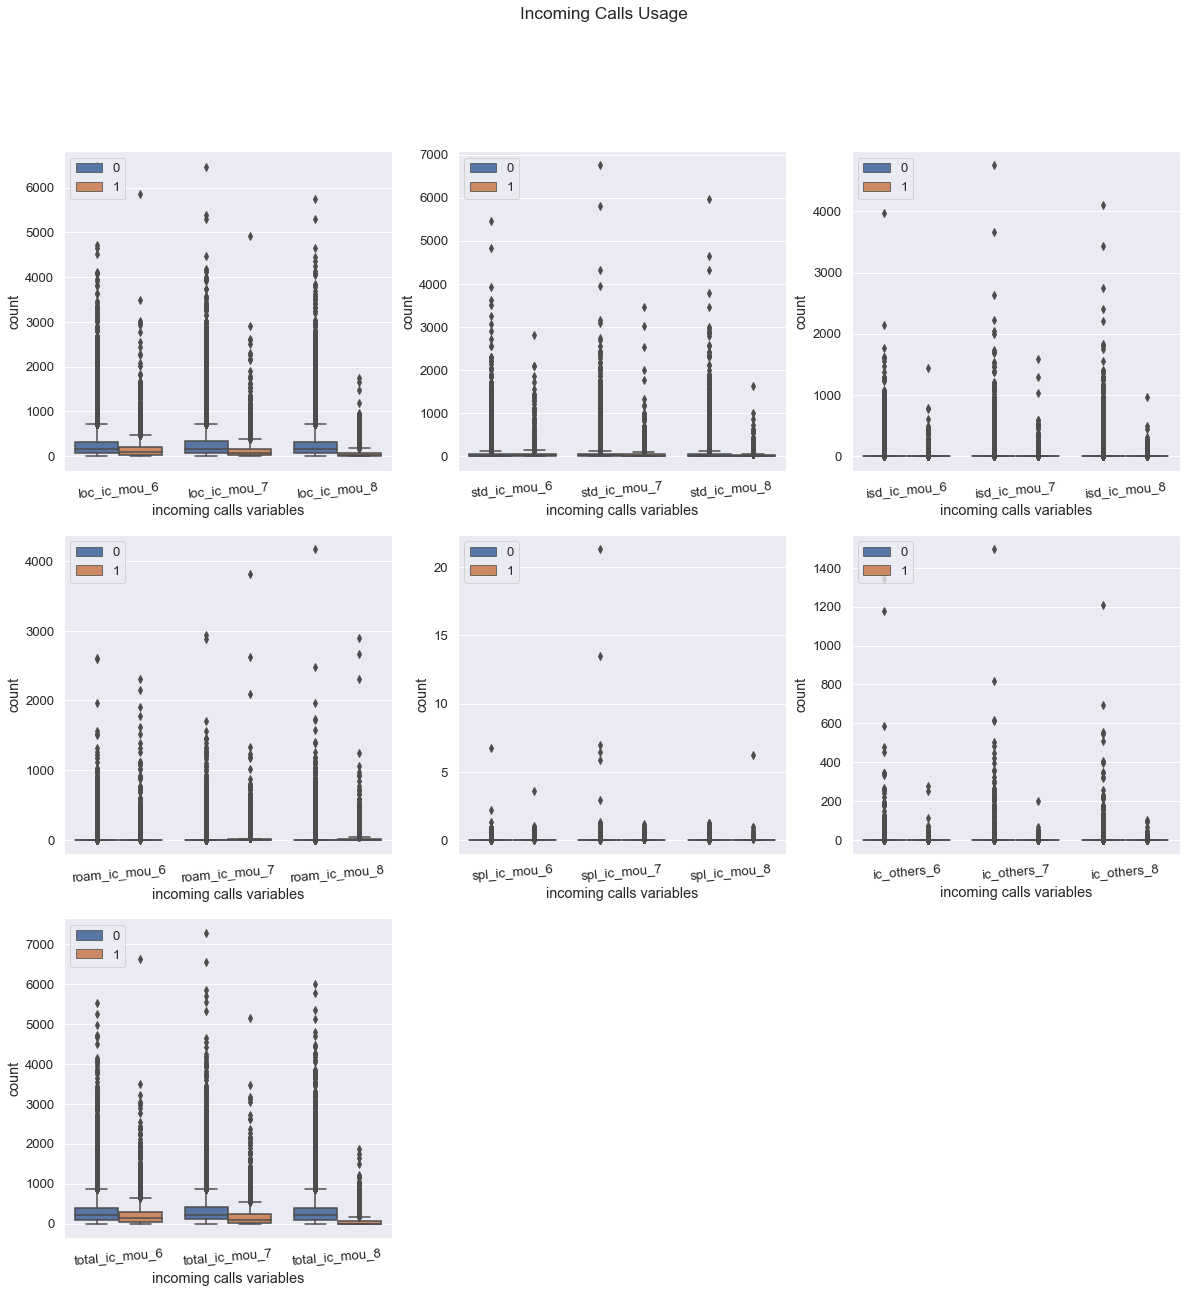

In [996]:
#Incoming calls usage

incoming_columns = [['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8'],
                    ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8'],
                    ['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8'],
                    ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],
                    ['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8'],
                    ['ic_others_6','ic_others_7','ic_others_8'],
                    ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']]
for i in range(0,7):
    display(telecom_data[incoming_columns[i]].describe())

plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
for i in range(0,7):
    plt.subplot(3,3,i+1)
    X = pd.concat([telecom_data[incoming_columns[i]],telecom_data['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="incoming calls variables",value_name='count')
    sns.boxplot(x="incoming calls variables", y="count", hue="churn",data=X)
    plt.xticks(rotation=5)    
    plt.legend(loc='upper left')
    plt.suptitle('Incoming Calls Usage')

In [997]:
outgoing_calls=[]
for x in range(len(telecom_data.columns)):
    if any(pd.Series(telecom_data.columns[x]).str.contains('og')):
        outgoing_calls.append(telecom_data.columns[x])
telecom_data[outgoing_calls].describe()


,loc_og_t2o_mou,std_og_t2o_mou,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,29865.0,29865.0,29663.00000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.00000,29041.000000,29663.0,29676.0,29041.0,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29979.000000,29979.000000,29979.000000
mean,0.0,0.0,29.66101,22.281627,22.177442,95.742759,96.765436,90.000551,183.268532,183.174937,173.030627,7.053548,7.172642,6.705906,1.584424,1.882820,1.769414,286.073738,287.122076,269.745785,191.914956,202.103541,177.922163,205.376377,215.696797,185.468308,2.033503,2.05668,1.848781,0.0,0.0,0.0,399.329215,419.861391,365.243279,2.290991,2.230369,2.095232,5.983799,7.505682,7.111893,0.700584,0.048137,0.061106,687.068925,709.531995,624.107691
std,0.0,0.0,119.22124,98.448242,107.926673,238.016910,249.324601,238.064175,250.855944,241.340643,236.689325,22.780541,22.702787,20.518192,6.927055,9.305441,7.513241,381.029238,376.804351,369.470137,411.577801,430.004870,415.595486,415.323157,439.802803,422.331860,12.528190,13.42370,11.889492,0.0,0.0,0.0,608.562481,639.529047,622.988427,46.186003,45.874448,45.534328,18.719302,23.181829,23.236275,2.293435,2.757213,3.375300,660.557039,685.283264,686.211375
min,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.00000,0.000000,0.000000,8.810000,9.590000,7.230000,31.750000,35.137500,26.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.390000,59.487500,45.390000,0.000000,0.000000,0.000000,1.940000,1.660000,0.460000,0.000000,0.00000,0.000000,0.0,0.0,0.0,6.710000,6.380000,3.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,266.480000,275.275000,188.965000
50%,0.0,0.0,0.00000,0.000000,0.000000,33.340000,33.890000,30.830000,103.530000,106.140000,95.930000,0.380000,0.450000,0.310000,0.000000,0.000000,0.000000,169.560000,173.460000,157.380000,13.690000,14.380000,7.840000,39.440000,39.250000,27.280000,0.000000,0.00000,0.000000,0.0,0.0,0.0,131.390000,138.380000,84.910000,0.000000,0.000000,0.000000,0.260000,0.830000,0.680000,0.000000,0.000000,0.000000,510.760000,526.130000,435.810000
75%,0.0,0.0,0.00000,0.000000,0.000000,92.700000,92.530000,87.590000,242.260000,241.060000,229.610000,5.205000,5.382500,4.980000,0.000000,0.130000,0.110000,377.060000,378.690000,357.540000,181.725000,195.230000,143.780000,214.390000,227.467500,174.860000,0.000000,0.00000,0.000000,0.0,0.0,0.0,579.245000,621.660000,502.210000,0.000000,0.000000,0.000000,5.280000,7.250000,6.710000,0.000000,0.000000,0.000000,899.960000,931.305000,833.435000
max,0.0,0.0,3775.11000,2812.040000,5337.040000,6431.330000,7400.660000,10752.560000,4729.740000,4557.140000,4

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
count,29663.000000,29676.000000,29041.000000
mean,286.073738,287.122076,269.745785
std,381.029238,376.804351,369.470137
min,0.000000,0.000000,0.000000
25%,53.390000,59.487500,45.390000
50%,169.560000,173.460000,157.380000
75%,377.060000,378.690000,357.540000
max,10643.380000,7674.780000,11039.910000


,std_og_mou_6,std_og_mou_7,std_og_mou_8
count,29663.000000,29676.000000,29041.000000
mean,399.329215,419.861391,365.243279
std,608.562481,639.529047,622.988427
min,0.000000,0.000000,0.000000
25%,6.710000,6.380000,3.160000
50%,131.390000,138.380000,84.910000
75%,579.245000,621.660000,502.210000
max,8432.990000,10936.730000,13980.060000


,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
count,29663.000000,29676.000000,29041.000000
mean,2.290991,2.230369,2.095232
std,46.186003,45.874448,45.534328
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,5900.660000,5490.280000,5681.540000


,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
count,29663.00000,29676.000000,29041.000000
mean,29.66101,22.281627,22.177442
std,119.22124,98.448242,107.926673
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000
max,3775.11000,2812.040000,5337.040000


,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8
count,29663.000000,29676.000000,29041.000000
mean,5.983799,7.505682,7.111893
std,18.719302,23.181829,23.236275
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.260000,0.830000,0.680000
75%,5.280000,7.250000,6.710000
max,1023.210000,1265.790000,1390.880000


,og_others_6,og_others_7,og_others_8
count,29663.000000,29676.000000,29041.000000
mean,0.700584,0.048137,0.061106
std,2.293435,2.757213,3.375300
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,100.610000,370.130000,394.930000


,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,29979.000000,29979.000000,29979.000000
mean,687.068925,709.531995,624.107691
std,660.557039,685.283264,686.211375
min,0.000000,0.000000,0.000000
25%,266.480000,275.275000,188.965000
50%,510.760000,526.130000,435.810000
75%,899.960000,931.305000,833.435000
max,10674.030000,11365.310000,14043.060000


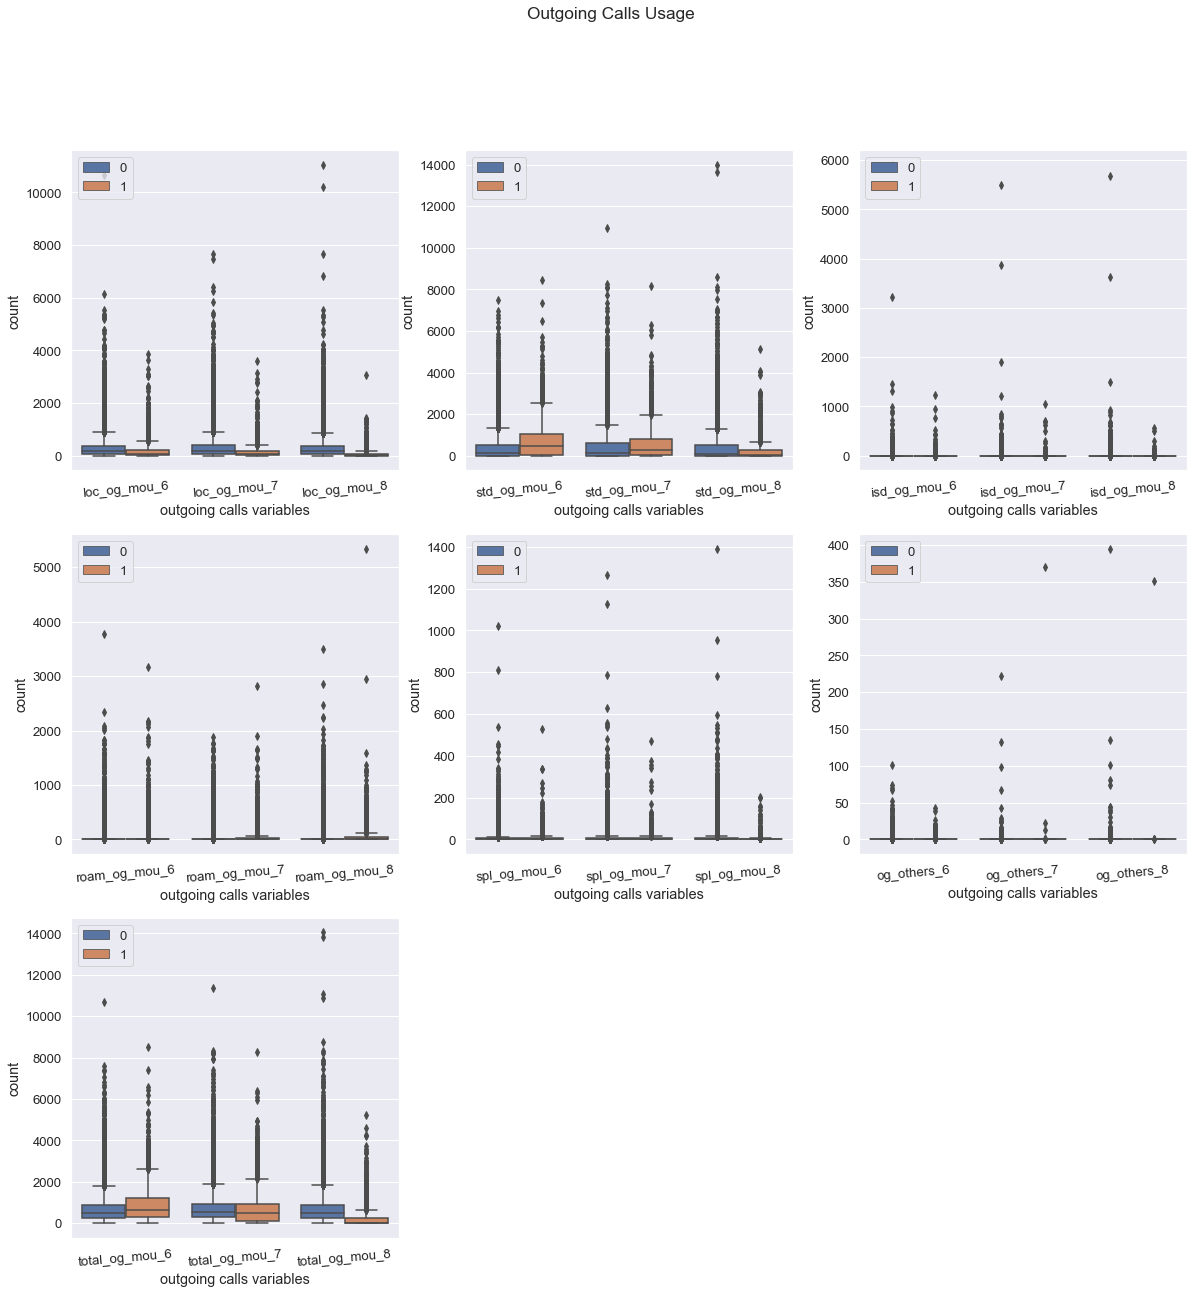

In [998]:
#Outgoing calls usage

#selecting relevant columns for analysis
outgoing_columns = [['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],
                    ['std_og_mou_6','std_og_mou_7','std_og_mou_8'],
                    ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8'],
                    ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],
                    ['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'],
                    ['og_others_6','og_others_7','og_others_8'],
                    ['total_og_mou_6','total_og_mou_7','total_og_mou_8']]
for i in range(0,7):
    display(telecom_data[outgoing_columns[i]].describe())

plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
for i in range(0,7):
    plt.subplot(3,3,i+1)
    X = pd.concat([telecom_data[outgoing_columns[i]],telecom_data['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="outgoing calls variables",value_name='count')
    sns.boxplot(x="outgoing calls variables",y="count",hue="churn",data=X)
    plt.xticks(rotation=5)    
    plt.suptitle('Outgoing Calls Usage')
    plt.legend(loc='upper left')

In [999]:
#2g & 3g data consumption

data_consumption=[]
for x in range(len(telecom_data.columns)):
    if any(pd.Series(telecom_data.columns[x]).str.contains('2g|3g')):
        data_consumption.append(telecom_data.columns[x])
telecom_data[data_consumption].describe()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,78.875263,78.196804,69.248761,258.623297,278.341301,270.061116,0.124954,0.131425,0.114080,0.499817,0.586877,0.607525,0.174055,0.185296,0.173321,0.138063,0.150339,0.140498,129.482436,135.225368,121.450911
std,277.525473,280.430249,268.616268,866.619871,856.096362,859.715968,0.374656,0.387793,0.357335,1.698845,1.900280,1.844605,0.574545,0.620703,0.583178,0.875984,0.969779,0.975212,390.625027,408.218570,389.910814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.470000,14.960000,9.625000,0.000000,2.275000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,2.025000,0.000000
max,10285.900000,7873.550000,11117.610000,45735.400000,28144.120000,30036.060000,4.000000,5.000000,5.000000,39.000000,48.000000,44.000000,14.000000,16.000000,16.000000,29.000000,35.000000,41.000000,12916.220000,9165.600000,11166.210000


,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
count,29979.000000,29979.000000,29979.000000
mean,78.875263,78.196804,69.248761
std,277.525473,280.430249,268.616268
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,14.470000,14.960000,9.625000
max,10285.900000,7873.550000,11117.610000


,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,29979.000000,29979.000000,29979.000000
mean,258.623297,278.341301,270.061116
std,866.619871,856.096362,859.715968
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,2.275000,0.000000
max,45735.400000,28144.120000,30036.060000


,monthly_2g_6,monthly_2g_7,monthly_2g_8
count,29979.000000,29979.000000,29979.000000
mean,0.124954,0.131425,0.114080
std,0.374656,0.387793,0.357335
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000


,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,29979.000000,29979.000000,29979.000000
mean,0.174055,0.185296,0.173321
std,0.574545,0.620703,0.583178
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,14.000000,16.000000,16.000000


,sachet_2g_6,sachet_2g_7,sachet_2g_8
count,29979.000000,29979.000000,29979.000000
mean,0.499817,0.586877,0.607525
std,1.698845,1.900280,1.844605
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,39.000000,48.000000,44.000000


,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,29979.000000,29979.000000,29979.000000
mean,0.138063,0.150339,0.140498
std,0.875984,0.969779,0.975212
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,29.000000,35.000000,41.000000


,jun_vbc_3g,jul_vbc_3g,aug_vbc_3g
count,29979.000000,29979.000000,29979.000000
mean,121.450911,135.225368,129.482436
std,389.910814,408.218570,390.625027
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,2.025000,1.600000
max,11166.210000,9165.600000,12916.220000


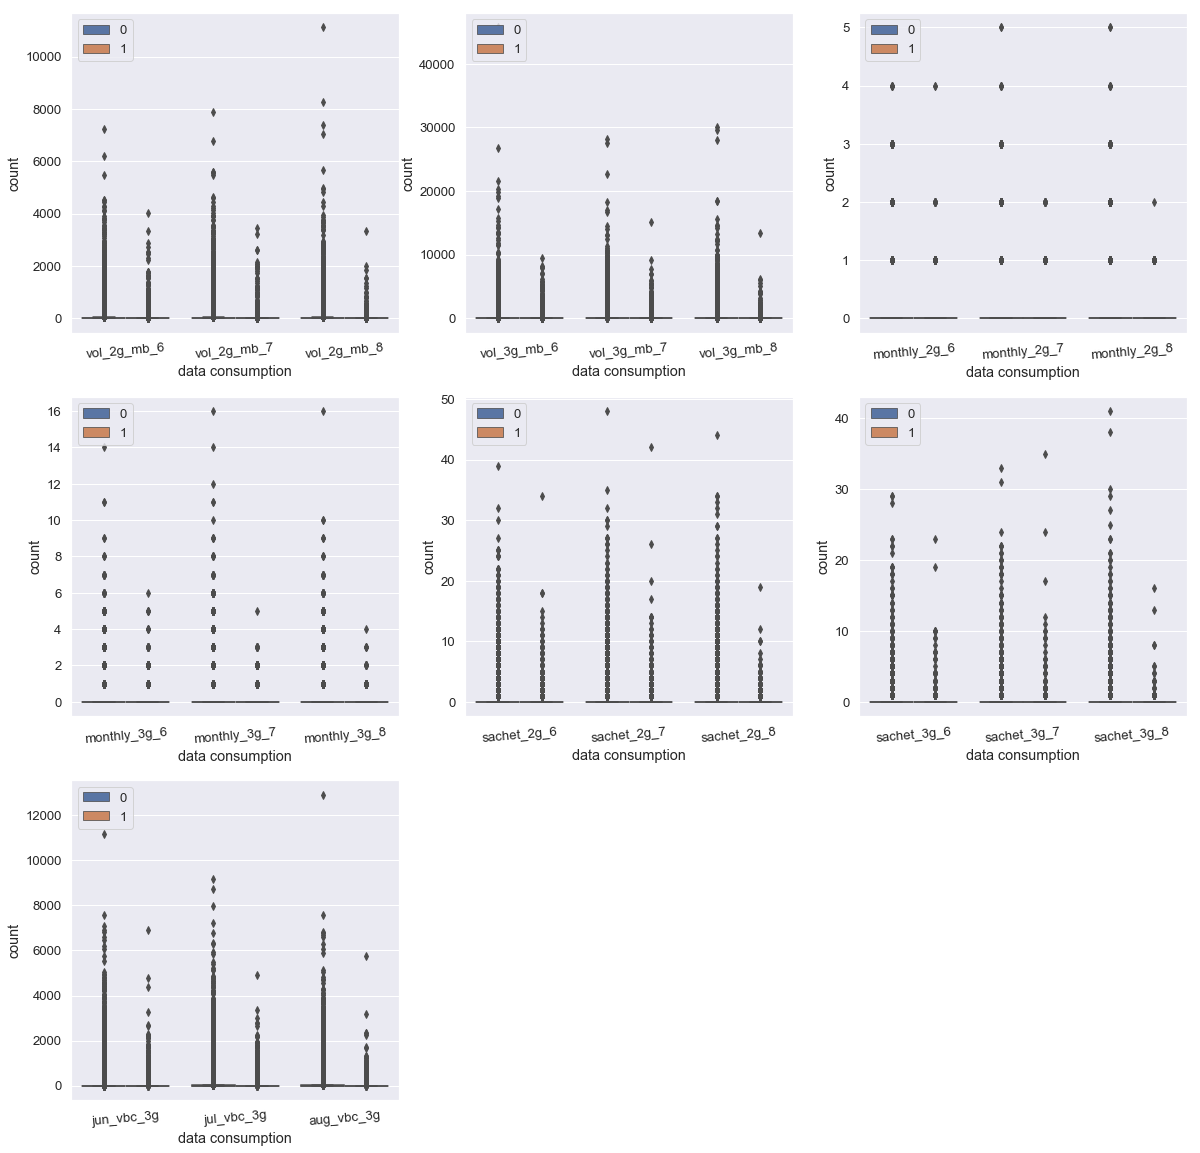

In [1000]:
data_consumption=[  ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']]
for i in range(0,7):
    display(telecom_data[data_consumption[i]].describe())

plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
for i in range(0,7):
    plt.subplot(3,3,i+1)
    X = pd.concat([telecom_data[data_consumption[i]],telecom_data['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="data consumption",value_name='count')
    sns.boxplot(x="data consumption", y="count", hue="churn",data=X)
    plt.legend(loc='upper left')
    plt.xticks(rotation=5) 
   

,night_pck_user_6,night_pck_user_7,night_pck_user_8
count,29979.000000,29979.000000,29979.000000
mean,-0.609794,-0.601454,-0.599053
std,0.508627,0.509375,0.508734
min,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


,fb_user_6,fb_user_7,fb_user_8
count,29979.000000,29979.000000,29979.000000
mean,-0.279229,-0.265486,-0.280430
std,0.939770,0.941656,0.926108
min,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


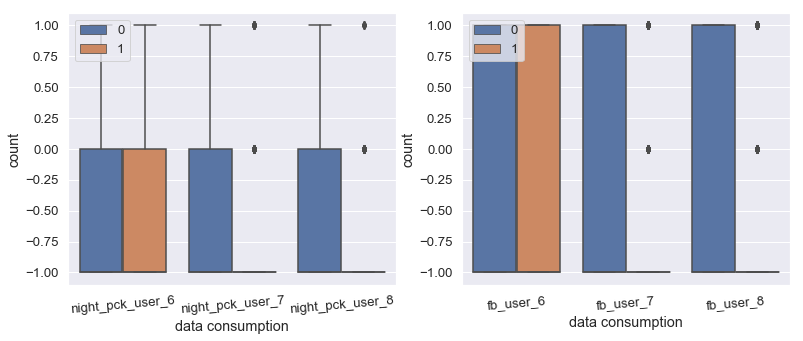

In [1001]:
cat_columns=[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'],
            ['fb_user_6', 'fb_user_7', 'fb_user_8',]]

for i in range(0,2):
    display(telecom_data[cat_columns[i]].describe())

plt.figure(figsize=(20,5))
sns.set(font_scale=1.2)
for i in range(0,2):
    plt.subplot(1,3,i+1)
    X = pd.concat([telecom_data[cat_columns[i]],telecom_data['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="data consumption",value_name='count')
    sns.boxplot(x="data consumption", y="count", hue="churn",data=X)
    plt.legend(loc='upper left')
    plt.xticks(rotation=5) 

In [1002]:
telecom_data.shape

(29979, 158)

### Outliers Treatment
Cap the outliers at the top percentile

In [1003]:
excluded_columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                   'fb_user_6','fb_user_7','fb_user_8',
                   'monthly_2g_6','monthly_2g_7','monthly_2g_8',
                   'monthly_3g_6','monthly_3g_7','monthly_3g_8',
                   'sachet_2g_6','sachet_2g_7','sachet_2g_8',
                   'sachet_3g_6','sachet_3g_7','sachet_3g_8',
                   'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                   'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_og_mou_6','og_others_6','spl_og_mou_7','og_others_7','spl_og_mou_8','og_others_8',
                   'loc_og_t2c_mou_6','std_og_t2f_mou_6','std_ic_t2f_mou_6','loc_ic_t2f_mou_6',
                   'loc_og_t2c_mou_7','std_og_t2f_mou_7','std_ic_t2f_mou_7','loc_ic_t2f_mou_7',
                   'loc_og_t2c_mou_8','std_og_t2f_mou_8','std_ic_t2f_mou_8','loc_ic_t2f_mou_8',
                   'aon','churn'
                  ]
cols = list(set(telecom_data.columns).difference(set(excluded_columns)))

# iterate through the columns and cap the values with the 99th percentile
for col in cols:
    percentiles = telecom_data[col].quantile([0.01,0.99]).values
    telecom_data[col][telecom_data[col] >= percentiles[1]] = percentiles[1]

In [1004]:
#Dropping outliers from specific columns
telecom_data = telecom_data.loc[~(
                    ((telecom_data['roam_og_mou_8'] > 2200) & (telecom_data['churn'] == 1)) |
                    ((telecom_data['arpu_7'] > 10000) & (telecom_data['churn'] == 1)) |
                    ((telecom_data['loc_og_mou_8'] > 2000) & (telecom_data['churn'] == 1)) |
                    ((telecom_data['loc_ic_mou_7'] > 4000) & (telecom_data['churn'] == 1)) |
                    ((telecom_data['std_og_mou_7'] > 7000) & (telecom_data['churn'] == 1)) |
                    ((telecom_data['vol_2g_mb_8'] > 2500) & (telecom_data['churn'] == 1)) 
                 )
               ]

In [1005]:
telecom_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_calls_mou_7,total_internet_mb_7,total_calls_mou_8,total_internet_mb_8,churn_7,churn_8,days_since_last_recharge_6,days_since_last_recharge_7,days_since_last_recharge_8,churn
7,0.0,0.0,0.0,1069.180,1349.850,1988.08226,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.7400,15.19,15.14,5,5,7,1580.0,790.0,2342.22,1000,790,951,0,0.0,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1167.28,0.00,778.90,0.00,0,0,3.0,6.0,5.0,1
8,0.0,0.0,0.0,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.0000,0.00,0.00,19,21,14,437.0,601.0,120.00,90,154,30,50,0.0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,460.15,1106.95,188.10,11.97,0,0,5.0,0.0,1.0,0
13,0.0,0.0,0.0,492.846,205.671,59

In [1006]:
#Drop all the columns that only have a 0.
drop_columns=[]
for columns in telecom_data.columns:
    if ((telecom_data[columns].max()==0) & (telecom_data[columns].min()==0)):
        drop_columns.append(columns)
telecom_data=telecom_data.drop(columns=drop_columns,axis=1)

In [1007]:
telecom_data.shape

(29979, 149)

In [1008]:
telecom_data=telecom_data.dropna(axis=0)

In [1009]:
#All numeric (float and int) variables in the dataset
telecom_data_numeric = telecom_data.select_dtypes(include=['float64', 'int64'])
telecom_data_numeric.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_calls_mou_7,total_internet_mb_7,total_calls_mou_8,total_internet_mb_8,churn_7,churn_8,days_since_last_recharge_6,days_since_last_recharge_7,days_since_last_recharge_8,churn
7,1069.180,1349.850,1988.08226,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.7400,15.19,15.14,5,5,7,1580.0,790.0,2342.22,1000,790,951,0,0.0,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1167.28,0.00,778.90,0.00,0,0,3.0,6.0,5.0,1
8,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.0000,0.00,0.00,19,21,14,437.0,601.0,120.00,90,154,30,50,0.0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,460.15,1106.95,188.10,11.97,0,0,5.0,0.0,1.0,0
13,492.846,205.671,593.26000,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.7

### Model Building

In [1010]:
from imblearn.over_sampling import ADASYN

In [1011]:
#Handling the imbalance
from collections import Counter
X = telecom_data_numeric
Y = telecom_data_numeric['churn']
adasyn = ADASYN(random_state=42)
X, Y = adasyn.fit_sample(X, Y)

print('Class Balance count : ',Counter(Y))

Class Balance count :  Counter({1: 26724, 0: 26706})


In [1012]:
#Splitting the dataset into Train & Test
X = telecom_data_numeric.drop("churn", axis = 1)
y = telecom_data_numeric["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [1013]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19918, 148)
(19918,)
(8537, 148)
(8537,)


In [1014]:
#PCA
pca = PCA(svd_solver="randomized", random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [1015]:
pca.components_

array([[ 7.43595269e-02,  1.02091140e-01,  1.02562000e-01, ...,
        -4.44641253e-04, -4.78195153e-04, -5.78860643e-04],
       [ 9.56451359e-02,  1.21522040e-01,  1.38394429e-01, ...,
         1.13100848e-04, -6.51887780e-05, -1.15003067e-04],
       [ 1.94573664e-02,  1.72972006e-02,  4.72488426e-02, ...,
         3.43240498e-04,  1.70190478e-04,  2.45878971e-04],
       ...,
       [ 2.26326795e-06,  7.05904391e-06, -7.88342980e-06, ...,
         2.25505597e-04,  2.58986468e-04, -1.16900875e-04],
       [-4.43353292e-06,  1.59985754e-05, -1.99335143e-05, ...,
        -5.92507214e-04,  1.88529425e-04, -7.55924955e-05],
       [-1.68683234e-05,  9.03975833e-06, -2.90026354e-06, ...,
         1.72394630e-04,  1.05429559e-04,  2.11428052e-06]])

In [1016]:
print(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)

[ 29.22  47.81  60.09  66.96  72.89  78.16  81.43  84.06  86.26  88.28
  89.97  91.07  91.97  92.84  93.65  94.27  94.77  95.24  95.67  96.06
  96.41  96.74  97.02  97.26  97.46  97.64  97.82  97.99  98.15  98.29
  98.41  98.53  98.64  98.74  98.84  98.91  98.97  99.02  99.08  99.13
  99.18  99.23  99.28  99.32  99.36  99.4   99.44  99.48  99.51  99.54
  99.57  99.6   99.63  99.66  99.68  99.71  99.73  99.75  99.77  99.79
  99.8   99.81  99.82  99.83  99.84  99.85  99.86  99.87  99.88  99.89
  99.9   99.9   99.91  99.92  99.93  99.93  99.94  99.94  99.95  99.95
  99.96  99.96  99.96  99.97  99.97  99.97  99.97  99.98  99.98  99.98
  99.98  99.99  99.99  99.99  99.99  99.99  99.99  99.99  99.99 100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   1

Text(0.5, 0, 'Number of Components')

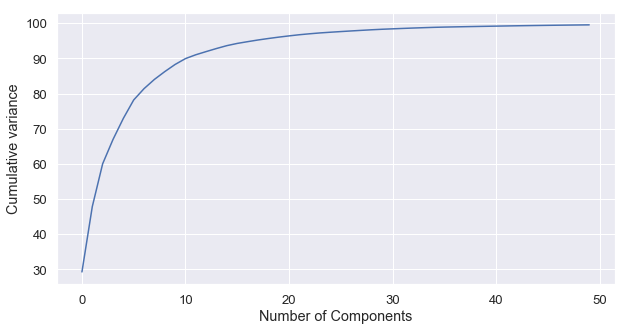

In [1083]:
# plot feature variance
features = range(pca.n_components_)
cummulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(10,5)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cummulative_variance)
plt.ylabel("Cumulative variance")
plt.xlabel("Number of Components")

In [1084]:
# Initialize pca with all components
pca = PCA(n_components=148, random_state=42)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train)
# transform the testing dataset
X_test_pca = pca.transform(X_test)
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

In [1085]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [1086]:
#Logistic Regression Model
from imblearn.metrics import sensitivity_specificity_support

from sklearn.linear_model import LogisticRegression
# initialize the model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
# fit the pca training data
lr_model.fit(X_train_pca, y_train)
# predict the pca testing data
Y_pred = lr_model.predict(X_test_pca)

acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, Y_pred, average='binary')
print("Confusion Matrix : \n",confusion_matrix(y_test, Y_pred))
print("Accuracy:\t",acc_score,"\nSensitivity: \t", round(sensitivity*100, 2), "\n", "Specificity: \t", round(specificity*100, 2), sep='')


Confusion Matrix : 
 [[6766 1271]
 [ 106  394]]
Accuracy:	83.87
Sensitivity: 	78.8
Specificity: 	84.19


In [1087]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# initialize the Model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
rf_model.fit(X_train_pca, y_train)
# predict the pca testing data
Y_pred = rf_model.predict(X_test_pca)

#sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support

acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, Y_pred, average='binary')
print("Confusion Matrix : \n",confusion_matrix(y_test, Y_pred))
print("Accuracy:\t",acc_score,"\nSensitivity: \t", round(sensitivity*100, 2), "\n", "Specificity: \t", round(specificity*100, 2), sep='')

Confusion Matrix : 
 [[7986   51]
 [ 435   65]]
Accuracy:	94.31
Sensitivity: 	13.0
Specificity: 	99.37


In [1088]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
# initialize the Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# fit the pca training data
dt_model.fit(X_train_pca, y_train)
# predict the pca testing data
Y_pred = dt_model.predict(X_test_pca)

#sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support

acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, Y_pred, average='binary')
print("Confusion Matrix : \n",confusion_matrix(y_test, Y_pred))
print("Accuracy:\t",acc_score,"\nSensitivity: \t", round(sensitivity*100, 2), "\n", "Specificity: \t", round(specificity*100, 2), sep='')


Confusion Matrix : 
 [[7681  356]
 [ 368  132]]
Accuracy:	91.52
Sensitivity: 	26.4
Specificity: 	95.57


Observation : PCA with Logistic Regression is the most suitable, as with other models like Decision Tree, the sensitivity measure drastically reduces. 

In [1095]:
# predictors
features = telecom_data_numeric.drop('churn',axis=1).columns

# feature_importance
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
feature_importance.head(10)

,variables,importance_percentage
0,total_internet_mb_8,8.253996
1,arpu_8,5.418746
2,arpu_7,4.744404
3,offnet_mou_6,3.531255
4,onnet_mou_8,3.168241
5,days_since_last_recharge_7,2.216360
6,av_rech_amt_data_8,2.147141
7,av_rech_amt_data_7,1.884846
8,onnet_mou_7,1.668650
9,loc_og_t2f_mou_7,1.384808


Conclusion: The top 10 indicators of churn are as listed above. 